# Facia Expression Recognioton

Facial expression plays an important role in cognition of human emotions (Fasel, 2003 & Yeasin, 2006). Facial expression is one of the most powerful, natural and immediate means of human beings to communicate their emotions and intentions. Hence recognition of facial expressions is very essential for human-computer interface applications.The recognition of facial expressions is a challenging task due to the different ways they are expressed in different individuals. Additionally, most of the time the head of the person might be tilted or the lightning of the image might not be suitable. Such cases can confuse classifiers and therefore, it is helpful to preprocess the data before feeding it into the classifier. 
 
Here, two different approaches are implemented to this problem. In the first approach, the 68 facial landmarks are extracted from each image and fed into the svm classifier as a row vector. In the second approach, covolutional neural networks are used.

## Dataset

The dataset used for this project is [Kaggle Facial expression recognition](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data). There are six basic emotions included in this dataset and a neutral state. but with regards to there are 4 basic emotions sadness, happiness, anger/disgust, fear/surprise. Each image is represented as a 48x48 matrix and is stored as a 2304 row vector in the dataset. each entity(row) in the dataset has three fields, "Emotion", "Pixels", and "Usage". The "Emotion" field has values from 0 to 6: 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral The next field, "Pixels", includes the 2304 row vector of pixel values. The last field, "Usage", can have three values "Training", "PrivateTest", "PublicTest".

Because I want to apply face alignment and landmark detection on the images, I first converted the 2304 vectors ((48,48) matrixes) to pictures and stored them in a folder named dataset. The dataset directory has a structure such as below picture:

![title](directory.png)



In [ ]:
from PIL import Image
import numpy as np
from scipy.misc import toimage
import csv


f = open('fer2013.csv')
csvf = csv.reader(f)
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)
angry,happy,sad,surprise=0,0,0,0
tangry,thappy,tsad,tsurprise=0,0,0,0
for row in csvf:

    if(str(row[2])=="Training"):

        if(str(row[0])=='0'):
            temp_list=[]
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            temp_arr=np.asarray(temp_list)
            temp_arr=temp_arr.reshape(48,48)
            im = Image.fromarray(temp_arr)
            im=toimage(im)
            s1="""data/train/angry/"""
            s=s1+str(angry)
            im.save(s+".png")
            angry+=1
        
        
        elif (str(row[0])=='3'):
            temp_list=[]
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            temp_arr=np.asarray(temp_list)
            temp_arr=temp_arr.reshape(48,48)
            im = Image.fromarray(temp_arr)
            im=toimage(im)
            s1="""data/train/happy/"""
            s=s1+str(happy)
            im.save(s+".png")
            happy+=1
        
        elif (str(row[0])=='4'):
            temp_list=[]
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            temp_arr=np.asarray(temp_list)
            temp_arr=temp_arr.reshape(48,48)
            im = Image.fromarray(temp_arr)
            im=toimage(im)
            s1="""data/train/sad/"""
            s=s1+str(sad)
            im.save(s+".png")
            sad+=1
        
        
        elif (str(row[0])=='5'):
            temp_list=[]
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            temp_arr=np.asarray(temp_list)
            temp_arr=temp_arr.reshape(48,48)
            im = Image.fromarray(temp_arr)
            im=toimage(im)
            s1="""data/train/surprise/"""
            s=s1+str(surprise)
            im.save(s+".png")
            surprise+=1
#-----------------------------------------------------------------       
    elif(str(row[2])=="PrivateTest"):
        if(str(row[0])=='0'):
            temp_list=[]
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            temp_arr=np.asarray(temp_list)
            temp_arr=temp_arr.reshape(48,48)
            im = Image.fromarray(temp_arr)
            im=toimage(im)
            s1="""data/validation/angry/"""
            s=s1+str(angry)
            im.save(s+".png")
            vangry+=1
        
        elif (str(row[0])=='3'):
            temp_list=[]
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            temp_arr=np.asarray(temp_list)
            temp_arr=temp_arr.reshape(48,48)
            im = Image.fromarray(temp_arr)
            im=toimage(im)
            s1="""data/validation/happy/"""
            s=s1+str(happy)
            im.save(s+".png")
            vhappy+=1
        
        elif (str(row[0])=='4'):
            temp_list=[]
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            temp_arr=np.asarray(temp_list)
            temp_arr=temp_arr.reshape(48,48)
            im = Image.fromarray(temp_arr)
            im=toimage(im)
            s1="""data/validation/sad/"""
            s=s1+str(sad)
            im.save(s+".png")
            vsad+=1
        
        
        elif (str(row[0])=='5'):
            temp_list=[]
            for pixel in row[1].split( ):
                temp_list.append(int(pixel))
            temp_arr=np.asarray(temp_list)
            temp_arr=temp_arr.reshape(48,48)
            im = Image.fromarray(temp_arr)
            im=toimage(im)
            s1="""data/validation/surprise/"""
            s=s1+str(surprise)
            im.save(s+".png")
            vsurprise+=1
        

## Approach 1: 68 Facial landmarks

### 1-1: 68 facial landmarks as a row vector

In the first approach, 68 landmarks each face in each picture is taken and they are passed to a SVM classifier. Since classifiers do not see the original picture and they are very senstitive to the coordinated of the 68 landmarks, a face alignment is applied first in order to rotate the face pictures so that the line conneting the eyes is horizental. The images are also a little zoomed in.

In [3]:
import os
import cv2
import dlib
import glob
import imutils
import itertools
import numpy as np
from scipy.misc import toimage
from helpers import shape_to_np
from IPython.display import Image
from helpers import FACIAL_LANDMARKS_IDXS
from imutils.face_utils import rect_to_bb
from imutils.face_utils import FaceAligner

In [50]:
class FaceAligner:
    def __init__(self, predictor, desiredLeftEye=(0.27, 0.27),
        desiredFaceWidth=256, desiredFaceHeight=None):
        self.predictor = predictor
        self.desiredLeftEye = desiredLeftEye
        self.desiredFaceWidth = desiredFaceWidth
        self.desiredFaceHeight = desiredFaceHeight
 
        if self.desiredFaceHeight is None:
            self.desiredFaceHeight = self.desiredFaceWidth
    def align(self, image, gray, rect):
        shape = self.predictor(gray, rect)
        shape = shape_to_np(shape)
 
        (lStart, lEnd) = FACIAL_LANDMARKS_IDXS["left_eye"]
        (rStart, rEnd) = FACIAL_LANDMARKS_IDXS["right_eye"]
        leftEyePts = shape[lStart:lEnd]
        rightEyePts = shape[rStart:rEnd]

        leftEyeCenter = leftEyePts.mean(axis=0).astype("int")
        rightEyeCenter = rightEyePts.mean(axis=0).astype("int")

        dY = rightEyeCenter[1] - leftEyeCenter[1]
        dX = rightEyeCenter[0] - leftEyeCenter[0]
        angle = np.degrees(np.arctan2(dY, dX)) - 180
        
        desiredRightEyeX = 1.0 - self.desiredLeftEye[0]

        dist = np.sqrt((dX ** 2) + (dY ** 2))
        desiredDist = (desiredRightEyeX - self.desiredLeftEye[0])
        desiredDist *= self.desiredFaceWidth
        scale = desiredDist / dist
        
        eyesCenter = ((leftEyeCenter[0] + rightEyeCenter[0]) // 2,
            (leftEyeCenter[1] + rightEyeCenter[1]) // 2)
        M = cv2.getRotationMatrix2D(eyesCenter, angle, scale)
 
        tX = self.desiredFaceWidth * 0.5
        tY = self.desiredFaceHeight * self.desiredLeftEye[1]
        M[0, 2] += (tX - eyesCenter[0])
        M[1, 2] += (tY - eyesCenter[1])
        
        (w, h) = (self.desiredFaceWidth, self.desiredFaceHeight)
        output = cv2.warpAffine(image, M, (w, h),
            flags=cv2.INTER_CUBIC)
 
        return output 
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
fa = FaceAligner(predictor, desiredFaceWidth=256)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
image=cv2.imread("data/train/happy/36.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
rects = detector(gray,2)
for rect in rects:
    (x, y, w, h) = rect_to_bb(rect)
    faceAligned = fa.align(image, gray, rect)
    cv2.imwrite("data//new//happy//36.png",faceAligned)


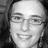

In [7]:
Image("data/train/happy/36.png",width=200, height=200)


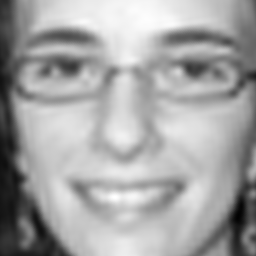

In [8]:
Image("data/new/happy/36.png", width=200, height=200)

In [ ]:
Now, The aligned pictures are written to a new directory.

In [101]:
import os

def align():
    detector = dlib.get_frontal_face_detector()
    predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")
    fa = FaceAligner(predictor, desiredFaceWidth=256)
    for emotion in emotions:
        print(" working on %s" %emotion)
        pictures = glob.glob("temp\\train\\%s\\*.png" %emotion)
        r=1
        for item in pictures:
            image = cv2.imread(item)
            #image = imutils.resize(image, width=800)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            #Image(gray)
#------------------------------------------------------  
            rects = detector(gray,2)
            for rect in rects:
                (x, y, w, h) = rect_to_bb(rect)
                faceAligned = fa.align(image, gray, rect)
                s1="pool//train//%s" %(emotion)
                s=s1+str(os.path.split(item)[-1])
                cv2.imwrite(s,faceAligned)
#------------------------------------------------------
emotions = ["angry","sad","fear", "happy"]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
align()


 working on angry
 working on sad
 working on fear
 working on happy


In [103]:
import cv2
import glob
import random
import math
import dlib
import itertools
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

emotions = ["angry","sad", "happy", "fear"]
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat") 
clf = SVC(kernel='linear', probability=True, tol=1e-3)
data = {}

def get_files(emotion):
    training = glob.glob("dataset\\train\\%s\\*.png" %emotion)
    prediction = glob.glob("dataset\\test\\%s\\*.png" %emotion)
    return training, prediction


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

#--------------------------------------------------------------------------------------------------
def get_landmarks(image):
    detections = detector(image, 1)
    for k,d in enumerate(detections):
        shape = predictor(image, d)
        xlist = []
        ylist = []
        for i in range(48,68):
            xlist.append(float(shape.part(i).x))
            ylist.append(float(shape.part(i).y))
        xmean = np.mean(xlist)
        ymean = np.mean(ylist)
        xcentral = [(x-xmean) for x in xlist]
        ycentral = [(y-ymean) for y in ylist]
        landmarks_vectorised = []
        for x, y, w, z in zip(xcentral, ycentral, xlist, ylist):
            landmarks_vectorised.append(w)
            landmarks_vectorised.append(z)
            meannp = np.asarray((ymean,xmean))
            coornp = np.asarray((z,w))
            landmarks_vectorised.append((math.atan2(y, x)*360)/(2*math.pi))
        data['landmarks_vectorised'] = landmarks_vectorised
    if len(detections) < 1:
        data['landmarks_vestorised'] = "error"
#--------------------------------------------------------------------------------------------------
def make_sets():
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    for emotion in emotions:
        print(" working on %s" %emotion)
        training, prediction = get_files(emotion)
        for item in training:
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            clahe_image = clahe.apply(gray)
            get_landmarks(clahe_image)
            if data['landmarks_vectorised'] == "error":
                print("no face detected on this one")
            else:
                X_train.append(data['landmarks_vectorised'])
                Y_train.append(emotions.index(emotion))
        for item in prediction:
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            clahe_image = clahe.apply(gray)
            get_landmarks(clahe_image)
            if data['landmarks_vectorised'] == "error":
                print("no face detected on this one")
            else:
                X_test.append(data['landmarks_vectorised'])
                Y_test.append(emotions.index(emotion))
    return X_train, Y_train, X_test, Y_test
#--------------------------------------------------------------------------------------------------
X_train, Y_train, X_test, Y_test = make_sets()


svm = SVC(kernel='linear', probability=True, tol=1e-3)
svm.fit(X_train, Y_train)
prediction = svm.predict(X_test)
print('Accuracy Score of SVM classifier',accuracy_score(Y_test, prediction), '\n')


 working on angry
 working on sad
 working on happy
 working on fear
Accuracy Score of SVM classifier 0.726666666667 



### 1-2: The distances between each two facial landmarks as a 2278 vector

based on the   [Exploiting Facial Landmarks for Emotion Recognition in the Wild](https://arxiv.org/ftp/arxiv/papers/1603/1603.09129.pdf) paper, we can improve the accuracy of our classifier by simply passing the euclidean distance between all combinations of two out of 68 facial landmarks to it instead of passing the 68 landmarks. This is understandable since the distance between the landmarks gives more information about the facial expression. For instance the distance between the edge of eyes with the edge of mouth is smaller in a happy face than in a surprised face.


In [91]:
from itertools import combinations

def euclidean_dist(x1,y1,x2,y2):
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2)


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

#--------------------------------------------------------------------------------------------------
def get_landmarks(image):
    points=[]
    detections = detector(image, 1)
    for k,d in enumerate(detections):
        shape = predictor(image, d)
        for i in range(0,68):
            points.append([int(shape.part(i).x), int(shape.part(i).y)])
        
        Pairofpoints=[]
        Pairofpoints.append(combinations(points,2))
        x1,y1,x2,y2=0,0,0,0
        vector=[]
        for p in Pairofpoints:
            for t in p:
                p1,p2=t
                x1=p1[0]
                y1=p1[1]
                x2=p2[0]
                y2=p2[1]    
                vector.append(euclidean_dist(x1,y1,x2,y2))
        return vector
    
    
def make_sets():
    X_train = []
    Y_train = []
    X_test = []
    Y_test = []
    for emotion in emotions:
        print(" working on %s" %emotion)
        training, prediction = get_files(emotion)
        for item in training:
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            clahe_image = clahe.apply(gray)
            landmark_distances=get_landmarks(clahe_image)
            if(isinstance(landmark_distances, list)):
                X_train.append(landmark_distances)
                Y_train.append(emotions.index(emotion))
            
        for item in prediction:
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            clahe_image = clahe.apply(gray)
            landmark_distances=get_landmarks(clahe_image)
            if(isinstance(landmark_distances, list)):
                X_test.append(landmark_distances)
                Y_test.append(emotions.index(emotion))
    return X_train, Y_train, X_test, Y_test
    
    

svm = SVC(kernel='linear', probability=True, tol=1e-3)
svm.fit(X_train, Y_train)
prediction = svm.predict(X_test)
print('Accuracy Score of SVM classifier',accuracy_score(Y_test, prediction), '\n')



Accuracy Score of SVM classifier 0.825 



## Approach 2

In the second approach, Convolutional Neural Networks are used. However since training CNN s is very time consuming, transfer learning technique was used. By fine-tuning VGGFace pre-trained model and without applying any preprocessing on the data, the models reaches 93% accuracy which is good.

In [ ]:
from PIL import Image
import numpy as np
from scipy.misc import toimage
import csv
import tensorflow
import keras

import os
print(os.sys.path)

import cv2

from keras.engine import  Model
from keras.layers import Flatten, Dense, Input
from keras_vggface.vggface import VGGFace
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.preprocessing import image
from keras.layers import Dense, GlobalAveragePooling2D
from keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np


nb_class = 4
hidden_dim = 512

img_width, img_height = 224,224
train_data_dir = "dataset/train"
validation_data_dir = "dataset/test"
nb_train_samples = 200
nb_validation_samples = 60
batch_size = 10
epochs = 10
print("hi")

vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
for layer in vgg_model.layers[:20]:
    layer.trainable = False

last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dense(hidden_dim, activation='relu', name='fc6')(x)
x = Dense(hidden_dim, activation='relu', name='fc7')(x)
out = Dense(nb_class, activation='softmax', name='fc8')(x)
custom_vgg_model = Model(vgg_model.input, out)
##################################################################

custom_vgg_model.compile(loss = "categorical_crossentropy", optimizer ='Adam' ,metrics=['accuracy'])

train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_width,img_height),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = ( img_width,img_height),
class_mode = "categorical")
###################################################################
# Save the model according to the conditions  
checkpoint = ModelCheckpoint("final2.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')
###################################################################
class prediction_history(keras.callbacks.Callback):
    def __init__(self):
        self.predhis = []
    def on_epoch_end(self, epoch, logs={}):
        self.predhis.append(print("pictures:",custom_vgg_model.predict(full,verbose=1)))

prediction=prediction_history()
#----------------------------------------
# Train the model 
history=custom_vgg_model.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early,prediction])
################################################################################
plot_model(custom_vgg_model, to_file='vggface.png')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

![title](vggfacc.png)

![title](vggfaceloss.png)

In [ ]:
#["angry","sad", "happy", "fear"]

img1_path='data/test/angry/208.png'
img2_path='data/test/happy/1.png'
img1 = image.load_img(img1_path, target_size=(224, 224))
img2 = image.load_img(img2_path, target_size=(224, 224))
img1 = np.reshape(img1,[224,224,3])
img2 = np.reshape(img2,[224,224,3])


full=np.stack((img1,img2), axis=0)

classes = model.predict(full, batch_size=20, verbose=1)
s=""



indices= a.argmax(axis=1)
s=emotions.index(indices[1])

base = Image.open(img_path1).convert('RGBA')
txt = Image.new('RGBA', base.size, (255,255,255,0))
fnt = ImageFont.truetype('C:/Windows/fonts/Arial/arialbd.ttf', 40)
d = ImageDraw.Draw(txt)
d.text((100,100), s, font=fnt, fill=(255,255,255,128))
d.text((100,160), s, font=fnt, fill=(255,255,255,255))
out = Image.alpha_composite(base, txt)
out.show()


![title](example.png)